## Numeric solutions of higher order difference equations


The solution of a difference equation can be found numerically using the matrix and vector form we introduced above. As we saw in the Fibonacci example, the next vector in the sequence can be obtained by multiplying the previous vector by the defining matrix. Let $\vec x_t$ be the vector containing $n$ values of the dependent variables, and $A$ be the defining matrix of dimension $k$ by $k$. The solutions are obtained by repeated multiplication by the matrix $A$:

$$
\vec x_{t+1} = A  \vec x_{t}
$$

We will now show how to implement this procedure in a program. For the simulation to be run, the program must set the following required components: the matrix defining the difference map, sufficient number of initial values, and the number of steps desired to iterate the solution. At each step, the current value of the vector of dependent variables is multiplied by the matrix $A$. In the following pseudocode I use two-dimensional arrays with two indices (row and column), and a colon in place of index indicates all of the elements in that dimension, e.g. $x[0,:]$ indicates the entire first row of array $x$. I assume that programming language has an operator for multiplying matrices, which is indicated by the multiplication symbol $\times$.

```{admonition} Solution of matrix discrete-time models
:class: tip 
 * set the number of variables $k$
 * set age-structured matrix $A$
 * set $n$ to be the number of iterations (time steps) 
 * set the initial condition vector $x_0$
 * initialize array $x$ with $n$ rows and $n + 1$ columns
 * set the first column to $x_0$
 * for $i$ from 0 to $n - 1$
   - $x[:, i+1] \gets A \times x[:, i]$
```

This code produces a rectangular array $x$ with $k$ rows and $n + 1$ columns. The values of the variables at time $j$ are stored in the vector $x[:,j]$. Conversely, in order to follow the dynamics of a particular variable over time, e.g. number $i$, through all $n$ time steps, we can plot the vector $x[:,i]$.


Let us take the Fibonacci model again in the matrix form, with the matrix $A$ and initial vector $\vec x_0$ as follows:

$$
A =  \left(\begin{array}{cc}1 & 1\\1 & 0\end{array}\right); \;  \vec x_0 =   \left(\begin{array}{c}1 \\1 \end{array}\right)
$$

After iterating the matrix equation for 10 time steps, we obtain the following array $X$, with the fist and second row representing the population at the current and the previous time step, respectively, and the column representing time step: 

$$\begin{array}{cccccccccc} 
 1 & 2 & 3 & 5 & 8 & 13 & 21 & 34 & 55 & 89 \\
 1 & 1 & 2 & 3 & 5 & 8 & 13  &  21 & 34 & 55  \\
 \end{array}
$$



In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices -- this week including some linear algebra
import matplotlib.pyplot as plt #package with plotting capabilities

## Matrix models in Python

In this section you will use Python's linear algebra library to compute the characteristic polynomial, eigenvalues, and eigenvectors of the models.
 
We saw in the section above that the found the eigenvalues by rewriting the equation for $\lambda$ as a kth order polynomial, then found its roots. Python has a command for that, we can construct the characteristic polynomial of a matrix using the function poly(A), where A is a matrix. More specifically, we can find the coefficients for the characteristic polynomial. 

Consider the Leslie population model from the example above:

$$
\left(\begin{array}{c}j_{t+1}\\ m_{t+1}\end{array}\right) =  \left(\begin{array}{cc}0 & 2 \\0.4 & 0\end{array}\right) \times \left(\begin{array}{c}j_{t}\\ m_{t}\end{array}\right)
$$

where $j_t$ is the number of juveniles after $t$ generations and $m_t$ is the number of mature individuals after $t$ generations. Propagation of this model requires multiplication of the matrix and the population vector. There is a special symbol in Python for this operation: 

In [3]:
L=np.array([[0, 2], [0.4, 0]]) # define Leslie matrix
print(L)
pop = np.array([50, 10]) # define population column vector
print(pop)
new_pop = L@pop
print(new_pop)

[[0.  2. ]
 [0.4 0. ]]
[50 10]
[20. 20.]


This propagates the population by one time step only. To compute a numeric solution of this population over a number of time steps, use a for loop like in our last week's assignment. The only difference is that the solution is now a two-dimensional array instead of a one-dimensional one, with two rows for the two ages and numsteps+1 columns, and it needs to be pre-allocated before the for loop:

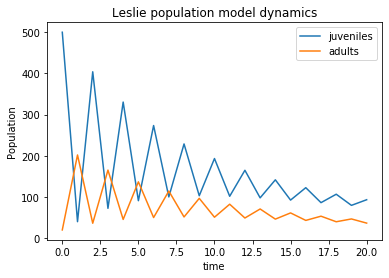

In [6]:
numsteps = 20; #number of time steps
L=np.array([[0, 2], [0.4, 0.1]]) # define Leslie matrix
pop = np.zeros([2, numsteps+1])
pop[:,0] = np.array([500,20]) #initialize the array with 50 juveniles and 10 adults
for i in range(numsteps):
    pop[:,i+1] = L@pop[:,i] #propagate the population vector for one step
plt.plot(pop[0,:],label='juveniles')
plt.plot(pop[1,:],label='adults') 
plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model dynamics')
plt.legend()
plt.show()

### Eigenvalue and eigenvector analysis

The *eigenvalues* of the matrix L determine the dynamics of the population, the the *eigenvectors* determine the population structure. Python has a single function for finding eigenvalues and eigenvectors: `np.linalg.eig()`.

In [19]:
eVals, eVecs = np.linalg.eig(L)

print('Eigenvalues:')
print(eVals) #the order is flipped from the other method, but that's ok
print('Eigenvectors:')
print(eVecs)

Eigenvalues:
[ 0.89442719 -0.89442719]
Eigenvectors:
[[ 0.91287093 -0.91287093]
 [ 0.40824829  0.40824829]]


Each column of the eVecs matrix corresponds to an eigenvaluein the eVals array (i.e. the first column of eigenvectors corresponds to the first element in eVals). 

The largest (in absolute value) eigenvalue is the *dominant eigenvalue* and determines the long term behavior of the population. In this example, both eigenvalues are equal in absolute value and are less than 1, which predicts population decay. 

The lack of a single dominant eigenvalue means that the population structure (ratio of juveniles and adults) does not converge to a stable fraction:

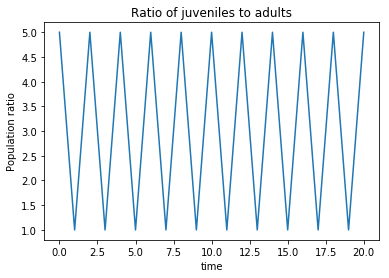

In [25]:
plt.plot(pop[0,:]/pop[1,:])
plt.xlabel('time')
plt.ylabel('Population ratio')
plt.title('Ratio of juveniles to adults')
plt.show()

### Eigenvectors and population structure

Let us modify the Leslie matrix to allow the adults to survive with probability 0.2, which creates an Usher matrix with the following eigenvalues and eigenvectors. Below we also calculate the fraction of juveniles and adults in the long-term population:

In [28]:
U=np.array([[0, 2], [0.4, 0.2]]) # define Usher matrix
print(U)

eVals, eVecs = np.linalg.eig(U)

print('Eigenvalues:')
print(eVals) #the order is flipped from the other method, but that's ok
print('Eigenvectors:')
print(eVecs)

print('The long term fractions of juveniles and adults are: ' + str(eVecs[:,1]/sum(eVecs[:,1])))

[[0.  2. ]
 [0.4 0.2]]
Eigenvalues:
[-0.8  1. ]
Eigenvectors:
[[-0.92847669 -0.89442719]
 [ 0.37139068 -0.4472136 ]]
The long term fractions of juveniles and adults are: [0.66666667 0.33333333]


Why did we use the second column (index 1)? Because it corresponds to the dominant eigenvalue 1, as you can check by looking at eVals. Notice that the population distribution remains stable in this population even as the total population declines, as can be seen by plotting the ratio of the juveniles to the adults:

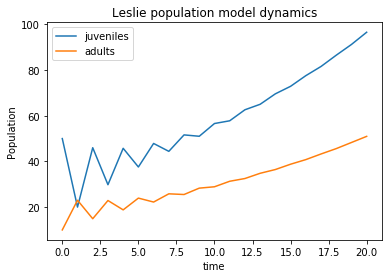

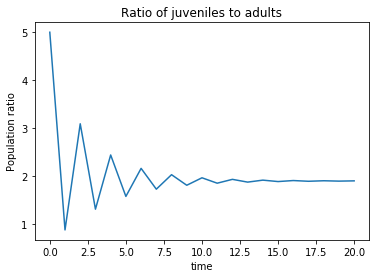

1.8

In [11]:
numsteps = 20; #number of time steps
U=np.array([[0, 2], [0.4, 0.2]]) # define Leslie matrix
pop = np.zeros([2, numsteps+1])
pop[:,0] = np.array([50,10]) #initialize the array with 50 juveniles and 10 adults
for i in range(numsteps):
    pop[:,i+1] = U@pop[:,i] #propagate the population vector for one step
plt.plot(pop[0,:],label='juveniles')
plt.plot(pop[1,:],label='adults') 
plt.xlabel('time')
plt.ylabel('Population')
plt.title('Leslie population model dynamics')
plt.legend()
plt.show()

plt.plot(pop[0,:]/pop[1,:])
plt.xlabel('time')
plt.ylabel('Population ratio')
plt.title('Ratio of juveniles to adults')
plt.show()
np.sqrt(3.24)

The juvenile/adult ratio converges to 2, as predicted by the leading eigenvector.